<a href="https://colab.research.google.com/github/HanJaeHui-GitHub/ESAA/blob/main/ESAA_YB_Week05_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5주차 과제_0930(월)

파이썬 머신러닝 완벽가이드 ch3. 1\~7 p.145\~180

## **정확도(Accuracy)**

- 정확도 : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표

$$정확도(Accuracy)=\frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수}$$

정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표이다.

이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.



- **정확도 지표가 ML 모델 성능을 왜곡시키는 예시**

    타이타닉 예제의 경우 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에 별다른 알고리즘의 적용 없이 무조건 성별이 여자인 경우 생존으로, 남자인 경우 사망으로 예측 결과를 예측해도 높은 정확도를 나타내는 알고리즘이 생성됨



In [ ]:
# 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고 성별에 따라 생존자를 예측하는 단순한 Classifier 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1

        return pred

In [ ]:
# 교재에 해당 코드가 없어서 인터넷 필사를 검색해서 찾은 코드
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
# 타이타닉 데이터를 가공하고 Classifier를 이용해 학습/예측/평가 적용하기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 # 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는:{0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는:0.7877


<ipython-input-2-35969484a89b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-2-35969484a89b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

이렇게 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과로 높은 수치가 나올 수 있기에 정확도를 평가 지표로 사용할 때는 매우 신중해야 한다.

특히 정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우 적합한 평가 지표가 아니다.

- **불균형한 데이터 세트에서 정확도 지표를 적용하는 예시**

    MNIST 데이터 세트는 0부터 9까지의 숫자 이미지의 픽셀 정보를 가지고 있으며 이를 기반으로 숫자 Digit을 예측하는데 사용함

    원래 MNIST 데이터 세트는 레이블 값이 0부터 9까지 있는 멀티 레이블 분류를 위한 것

    이 데이터를 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환해 이진 분류 문제로 바꾸어 생각해보기(전체 데이터의 10%가 True, 나머지 90%는 False인 불균형 데이터 세트로 변형)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [ ]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세ㄴ트에서는 성능 수치로 사용돼서는 안 됨.

## **오차 행렬(confusion matrix, 혼동행렬)**

- 오차 행렬 : 이진 분류에서 성능 지표로 활용됨, 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표

    즉, 이진 분류의 예측 오류가 얼마인지와 더불어 떠한 유형의 예측 오류가 발생하고 있는지 함께 나타내는 지표

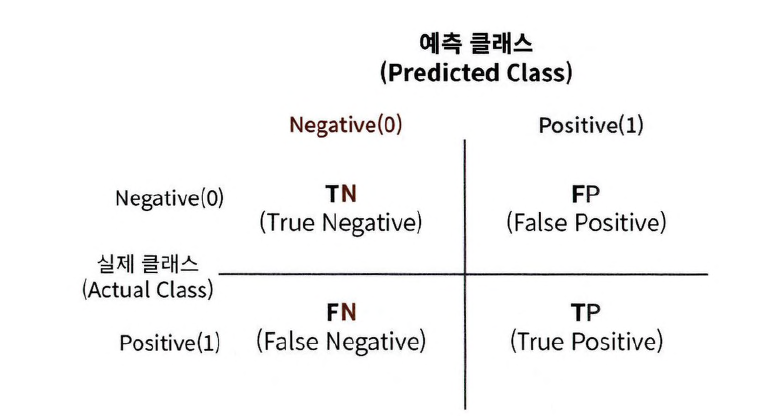

- TN : 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0

- FP : 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0

- FN : 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 1

- TP : 예측값을 Positive 값 1로 예측했고 실제 값 역시 Positive 값 1

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

TN = array[0,0] = 405 = 전체 450건 데이터 중 무조건 Negative 0으로 예측해서 True가 된 결과

FP = array[0,1] = 0

FN = array[1,0] = 45 = Negative로 예측해서 False가 된 결과

TP = array[1,1] = 0

위의 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도 (Precision), 재현율(Recall) 값을 구할 수 있음

$$정확도=\frac{예측 결과와 실제 값이 동일한 건수}{전체 데이터 수}=\frac{(TN+TP)}{(TN+FP+FN+TP)}$$

일반적으로 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive를 설정해 1로 부여하고, 그렇지 않은 경우는 Negative로 0값을 부여함

불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수 작음 → 데이터에 기반한 ML 알고리즘은 Negative으로 예측 정확도가 높아지는 경향 발생 → TN은 커지고 TP는 작아짐, FN이 작아짐(Negative로 예측할 때 정확도가 높아서), FP도 작아짐(Positive로 예측하는 경우가 작아서) → Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적 판단 오류 발생

## **정밀도와 재현율**

- 정밀도 : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

    Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 **양성 예측도**라고도 불림

$$정확도(Accuracy)=\frac{예측과\ 실제\ 값이\ Positive로 일치한\ 데이터\ 건수}{예측을\ Positive로\ 한\ 모든\ 데이터\ 건수}=\frac{TP}{(FP+TP)}$$



- 재현율 : 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

    **민감도(Sensitivity)** 또는 **TPR(True Positive Rate)**라고도 불림

$$재현율=\frac{예측과\ 실제\ 값이\ Positive로\ 일치한\ 데이터\ 건수}{실제\ 값이\ Positive인\ 모든\ 데이터\ 건수}=\frac{TP}{(FN+TP)}$$

- 재현율이 중요 지표인 경우

    실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

    ex) 암 판단 모델, 금융 사기 적발 모델

- 정밀도가 중요 지표인 경우

    실제 Negative 음성 데이터를 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

    ex) 스팸 메일 여부 판단 모델


재현율, 정밀도 모두 TP를 높이는 데 초점을 맞추지만 재현율은 FN, 정밀도는 FP를 낮추는데 초점을 맞춤

- **타이타닉 예제에서 오차 행렬 및 정밀도, 재현율 모두 구해서 예측 성능 평가하기**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

<ipython-input-2-35969484a89b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-2-35969484a89b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705


### **정밀도/재현율 트레이드오프**

분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다. 그러나 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬운데 이러한 특성을 **정밀도/재현율의 트레이드오프(Trade-off)**라고 한다.

In [ ]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫 번째 칼럼 값과 두 번째 칼럼 값을 더하면 1이 됨

맨 마지막 줄의 predict() 메서드의 결과 비교에서도 나타나듯이 두 개의 칼럼 중에서 더 큰 확률 값으로 최종 예측

In [ ]:
# predixt_proba() 메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임곗값을 만족하는 ndarrayd의 칼럼 위치를 최종 예측 클래스로 결정함
# Binarizer 클래스를 이용해 구현하기
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
# Binarizer를 이용해 사이킷런 predict()의 의사(pseudo) 코드
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705


In [ ]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197


임계값을 낮추니 재현율이 올라가고 정밀도가 떨어짐

↪ 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 되는데 확률를 0.5가 아닌 0.4부터 Positive로 예측을 너그럽게 하기 때문에 임곗값을 낮출수록 True 값이 많아지기 때문

In [ ]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도:0.7869, 재현율:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도:0.8654, 재현율:0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율:0.7213


In [ ]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임계값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도: [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


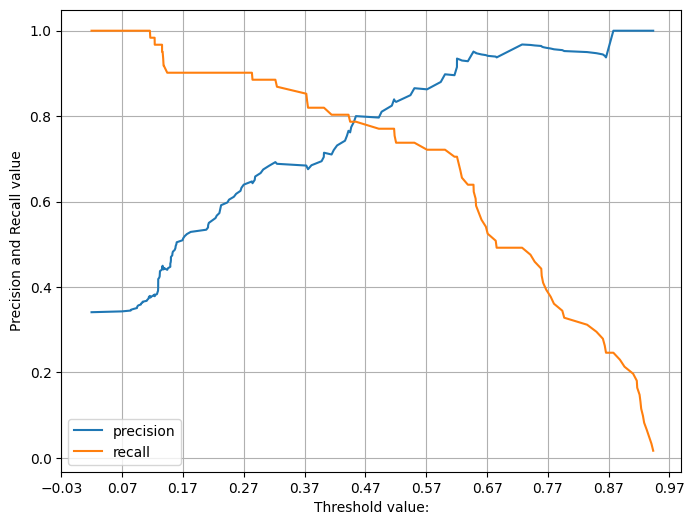

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    # threshold 값 X 축 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축. y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value:'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

### **정밀도와 재현율의 맹점**

Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨

물론 분류가 정밀도 또는 재현율 중 하나에 상대적인 중요도를 부여해 각 예측 상황에 맞는 분류 알고리즘을 튜닝할 수 있지만 그렇다고 정밀도/재현율 중 하나만 강조하는 상황이 돼서는 안 됨

## **F1 스코어**

- **F1 스코어** : 정밀도와 재현율을 결합한 지표로 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

$$F1=\frac{2}{\frac{1}{recall}+\frac{1}{precision}}=2*\frac{precision*recall}{precision+recall}$$

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어:{0:.4f}'.format(f1))

F1 스코어:0.7966


In [ ]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도:0.7869, 재현율:0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도:0.8654, 재현율:0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율:0.7213, F1:0.8000


## **ROC 곡선과 AUC**

- **ROC 곡선(Receiver Operation Characteristic Curve)** : 수신자 판단 곡선으로 FPR(False Positive Rate)이 변할 때 TRP(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선

    * TPR(= 재현율, 민감도) : True Positive Rate의 약자, 실제값 Positive(양성)가 정확히 예측돼야 하는 수준

    * TNR(= 특이성)  : True Negative Rate의 약자, 실제값 Negative(음성)가 정확히 예측돼야 하는 수준



<center>$TPR=\frac{TP}{(FN+TP)}$</center>

<center>$TNR=\frac{TN}{(FP+TN)}$</center>

ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구함

FPR을 0부터 1까지 변경하는 방법

↪ 분류 결정 임곗값을 변경

* FPR을 0으로 만드는 법

    임곗값을 1로 지정하면 Positive 예측 기준이 매우 높아져 아예 Positive로 예측하지 않기 때문에 FP값이 0이 되므로 FPR도 0이 됨.

* FPR을 1으로 만드는 법

    임곗값을 0로 지정하면 Positive 예측 기준이 매우 낮아져 아예 Negative 예측이 없기 때문에 TN값이 0이 되므로 FPR은 1이 됨.

In [ ]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arrange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


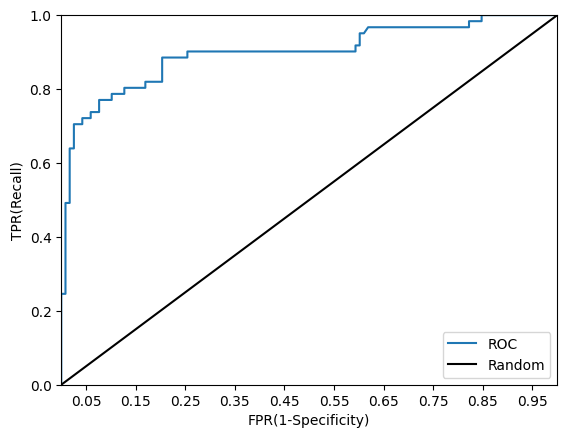

In [ ]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k-',label='Random')

    # FPR X축의 Scale을 0.1 단위로 변경 X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)');plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

- **AUC(Area Under Curve)** : ROC 곡선 밑의 면적을 구한 것으로 일반적으로 1에 가까울수록 좋은 수치임

    AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있냐가 관건임

In [ ]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값:{0:.4f}'.format(roc_score))

ROC AUC 값:0.8987


In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## **피마 인디언 당뇨병 예측**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv("/content/drive/MyDrive/ESSA/데이터/diabetes.csv")
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

In [ ]:
diabetes_data.info() # Null 값 없음, 피처 타입 : 숫자형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값임, 칼럼 위치를 -1을 이용해 추출
X = diabetes_data.iloc[:, : -1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1:0.6465, AUC:0.8083


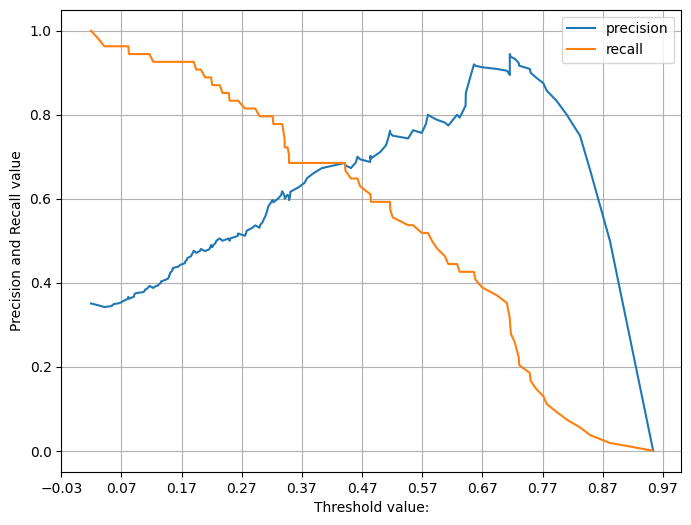

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [ ]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

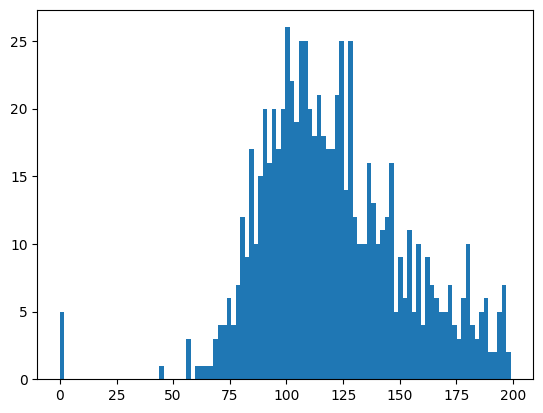

In [ ]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [ ]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [ ]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체

mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [ ]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1:0.6804, AUC:0.8433


In [ ]:
## 임곗값을 0.3에서 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화 출력

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1:0.6615, AUC:0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1:0.6774, AUC:0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1:0.6667, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1:0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1:0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1:0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1:0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1:0.6804, AUC:0.8433


In [ ]:
binarizer = Binarizer(threshold = 0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1:0.6931, AUC:0.8433


# 5주차 과제_1004(금)

파이썬 머신러닝 완벽가이드 ch4. 1\~2 p.181\~210

## **분류(Classification)의 개요**

지도학습 : 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

- **분류(Classification)** :
    
    지도학습의 대표적인 유형
    
    학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

    즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것

<<분류를 구현할 수 있는 다양한 머신러닝 알고리즘>>

-  베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

- **앙상블 방법(Ensemble Method)** :

    정형 데이터의 예측 분석 영역에서 앙상블이 매우 높은 예측 성능으로 인해 많이 애용됨

    * **배깅(Bagging)**

        **랜덤 포레스트(Random Forest)** : 배깅 방식의 대표, 뛰어난 예측 성능,상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용

    * **부스팅(Boosting)**

        **그래디언트 부스팅(Gradient Boosting)** : 부스팅의 효시, 뛰어난 예측 성능을 가지고 있지만 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려움
        
        **XgBoost(eXtra Gradient Boost), LightGBM** 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축 시킨 알고리즘 등장



## **결정 트리**

ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘

데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것

일반적으로 규칙을 가장 쉽게 표현하는 방법 : if/else 기반으로 나타내기 → 데이터의 어떤 기준을 바탕으로 규칙을만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함

* 규칙 노드(Decision Node)로 표시된 노드 : 규칙 조건

* 리프 노드(Leaf Node)로 표시된 노드 : 결정된 클래스 값

* 새로운 규칙 조건마다 서브 트리(Sub Tree) 생성

데이터 세트에 있는 피처를 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐

많은 규칙 = 분류를 결정하는 방식이 복잡해짐 = 과적합 = 트리의 깊이(depth)가 깊어짐 = 결정 트리의 예측 성능이 저하될 가능성이 높음

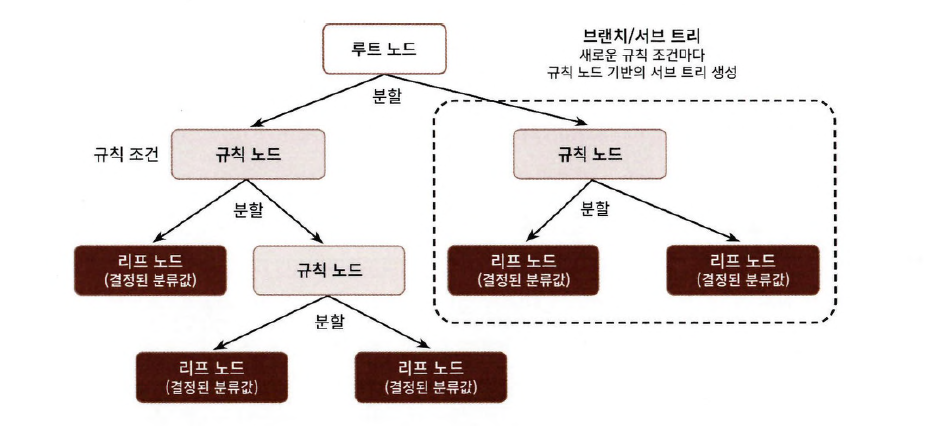

가능한 적은 결정 노드로 높은 예측 정확도 가지기 위해서는 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙을 정해야 함 → 트리를 어떻게 분할(Split)할 것인가가 중요함 → 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요함

균일도 ⇔ 혼잡도

<정보의 균일도를 측정하는 대표적인 방법>

- **엔트로피를 이용한 정보 이득(Information Gain) 지수**

    엔트로피 : 주어진 데이터 집합의 혼잡도 의미, 서로 다른 값이 섞여 있으면 엔트로피가 높고 같은 값이 섞여 있으면 엔트로피 낮음

    정보 이즉 지수 : 1에서 엔트로피 지수를 뺸 값(1 - 엔트로피 지수), 결정 트리는 **정보 이득이 높은 속성을 기준으로 분할함**

- **지니 계수**

    경제학에서 불평등 지수를 나타내는 계수

    0이 가장 평등하고 1로 갈수록 불평등함

    머신러닝에서는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 **지니 계수가 낮은 속성을 기준으로 분할함**

[**DecisionTreeClassifier**]

결정 트리 알고리즘을 사잇킬런에서 구현한 것

기본으로 지니 계수를 이용해 데이터 세트 분할

정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 지식 트리 노드에 걸쳐 반복적으로 분할 한 뒤 데이터가 모두 특정 분류에 속하면 분할을 멈추고 분류 결정
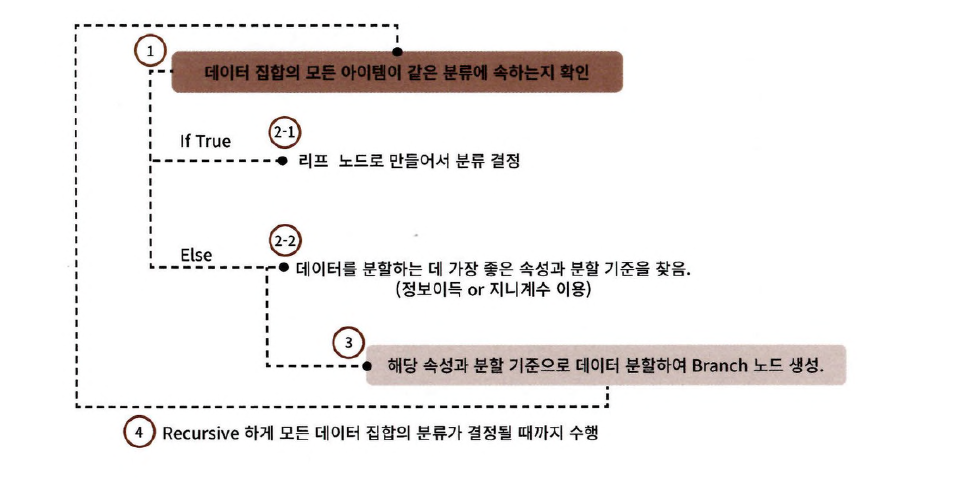

### **결정 트리 모델의 특징**

<<결정 트리의 장점>>

정보의 '균일도'라는 룰을 기반으로 함 → 알고리즘이 쉽고 직관적임

결정 트리 룰이 매우 명확하고 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고 시각화로 표현까지 가능

정보의 균일도만 신경 쓰면 됨 → 각 피처의 스케일링과 정규화 같은 전처리 작업 필요 없음

<<결정 트리의 단점>>

과적합으로 정확도가 떨어짐 ← 피처의 균일도에 따른 룰 규칙으로 서브 트리를 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수 밖에 없음

복잡한 학습 모델은 실제 상황(테스트 데이터 세트)에 유연하게 대처할 수 없엇 예측 성능이 떨어짐

트리의 크기를 사전에 제한하는 것이 성능 튜닝에 더 도움이 됨

### **결정 트리 파라미터**

<<결정 트리 알고리즘 구현>>

- **DecisionTreeClassifier** : 분류를 위한 클래스

- **DecisionTreeRegressor** : 회귀를 위한 클래스

<<결정 트리 구현>>

-**CART(Classification And Regression Trees)** : 분류, 회기 모두 사용 가능한 트리 알고리즘

<<사용되는 파라미터>>

- **min_samples_split** :
    
    노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용

    디폴트 = 2, 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가

- **min_samples_leaf** :

    분할될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수

    큰 값으로 설정될수록 최소한의 샘플 데이터 수 조건을 만족시키기 어려워 노드 분할을 상대적으로 덜 수행

    과적합 제어 용도 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있어 이 경우는 작게 설정 필요


- **mas_features** :

    최적의 분할을 위해 고려할 최대 피처 개수

    디폴트 = None, 데이터 세트의 모든 피처를 사용해 분할 수행

    int형 지정 → 대상 피처의 개수, float형 지정 → 전체 피치 중 대상 피처의 퍼센트

    'sqrt' = 'auto'

    'log' = log2(전체 피처 개수) 선정

    'None'은 전체 피처 선청

- **max_depth** :

    트리의 최대 깊이 규정

    디폴트 = None → 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_amples_split보다 작아질 때까지 계속 깊이 증가시킴

    깊이가 깊어지면 과적합할 수 있으므로 적절한 값 제어 필요

- **max_leaf_nodes** :

    밑단 노드(Leaf)의 최대 개수

### **결정 트리 모델의 시각화**

**Graphviz** : 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지

- **export_graphviz** : 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 줌

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붖꽃 데이터 세트 로딩, 세트 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTree Classifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

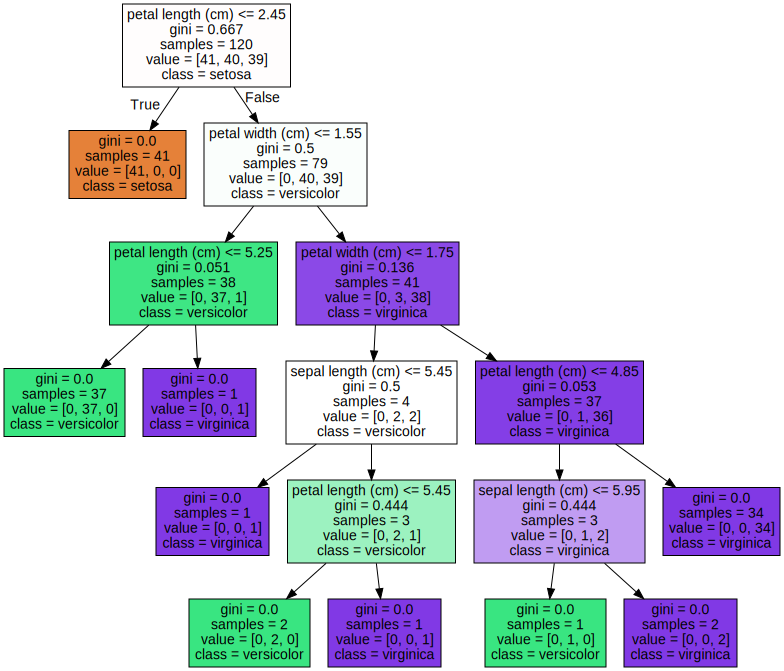

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<<노드 내에 기술된 지표의 의미>>

- petal length(cm)<=2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건임. 이 조건이 없으면 리프 노드

- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수

- samples는 현 규칙에 해당하는 데이터 건수

- value=[]는 클래스 값 기반의 데이터 건수. 붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지고 있으며 0 : Setosa, 1 : Versicolor, 2 : Virginica 품종을 가리킴. 만일 Value=[41, 40, 39]라면 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미.

<<시각화된 결정 트리 설명>>

- 1번 노드(루트 노드)

    * samples = 120개는 전체 데이터가 120개
    * value = [41, 40, 39]는 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성
    * sample 120개가 value = [41, 40, 39] 분포도로 되어 있으므로 지니 계수는 0.667
    * petal length(cm)<=2.45 규칙으로 자식 노드(2,3번 노드) 생성
    * class = setosa는 하위 노드를 가질 경우에 setosa의 개수가 41개로 제일 많다는 의미

- 2번 노드

    * 모든 데이터가 Setosa로 결정되므로 클래스가 결정된 리프 노드 → 더이상 규칙 만들 필요 없음
    * petal length(cm)<=2.45가 TRUE
    * 41개의 샘플 데이터 모두 Setosa이므로 예측 클래스는 Setosa로 결정
    * 지니 계쑤는 0

- 3번 노드

    * petal length(cm)<=2.45가 FALSE
    * 79개의 샘플 데이터 중 Versicolor 40개, Virginica 39개로 여전히 지니 계수가 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙 필요
    * petal length(cm)<=1.55 규칙으로 자식 노드(4,5번 노드) 생성

- 4번 노드

    * petal length(cm)<=1.55가 TRUE
    * 38개의 샘플 데이터 중 Versicolor 37개, Virginica 1개로 대부분이 Versicolor임
    * 지니 계수는 0.051로 매우 낮으나 여전히 Versicolor, Virginica가 혼재돼 있으므로 petal length(cm)<=5.25라는 새로운 규칙으로 자식노드 생성

- 5번 노드

    * petal length(cm)<=1.55가 FALSE
    * 41개의 샘플 데이터 중 Versicolor 3개, Virginica 38개로 대부분 virginica임.
    * 지니 계수는 0.136로 매우 낮으나 여전히 Versicolor, Virginica가 혼재돼 있으므로 petal width(cm)<=1.75라는 새로운 규칙으로 자식노드 생성

각 노드의 색깔 = 붓꽃 데이터의 레이블 값

↪ **주황색** 0 : Setosa, **초록색** 1 : Versicolor, **보라색** 2 : Virginica

색이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많음을 의미

<max_depth 하이퍼 파라미터 변경에 따른 트리 변화>

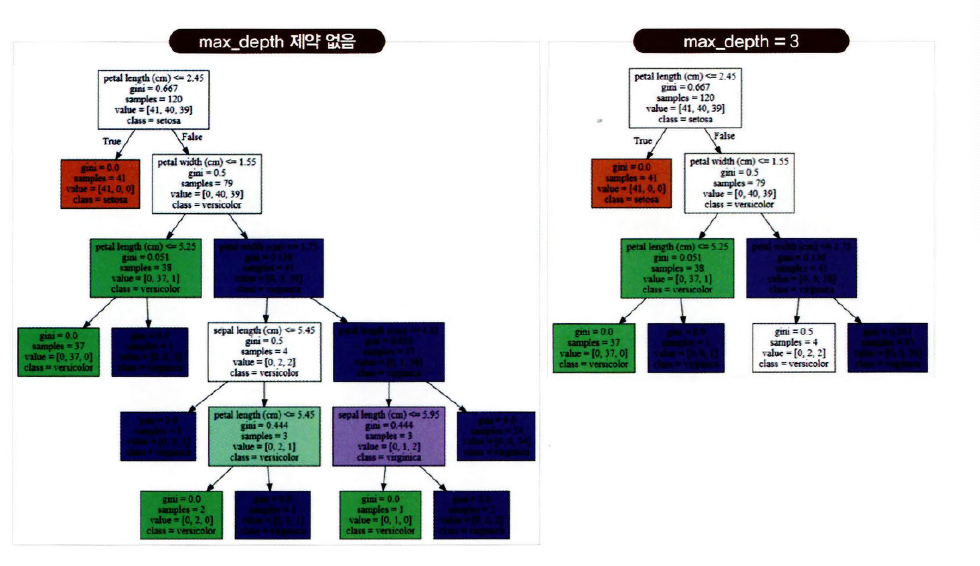

<min_sample_split 하이퍼 파라미터 변경에 따른 규칙 트리 변화>

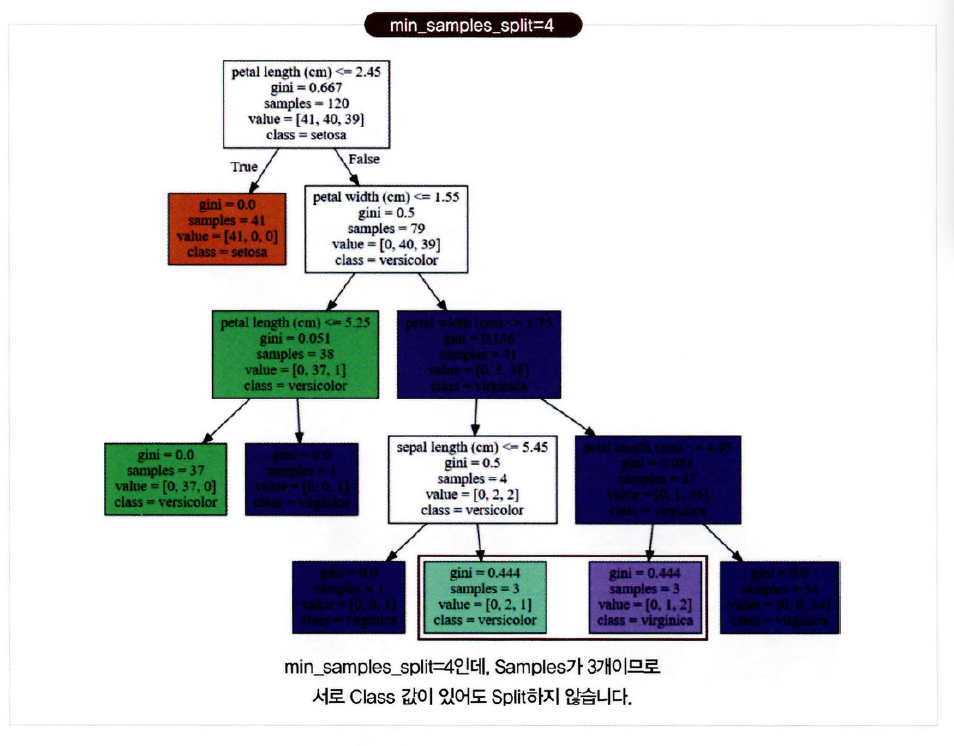

<min_sample_leaf 하이퍼 파라미터 변경에 따른 결정 트리 변화>

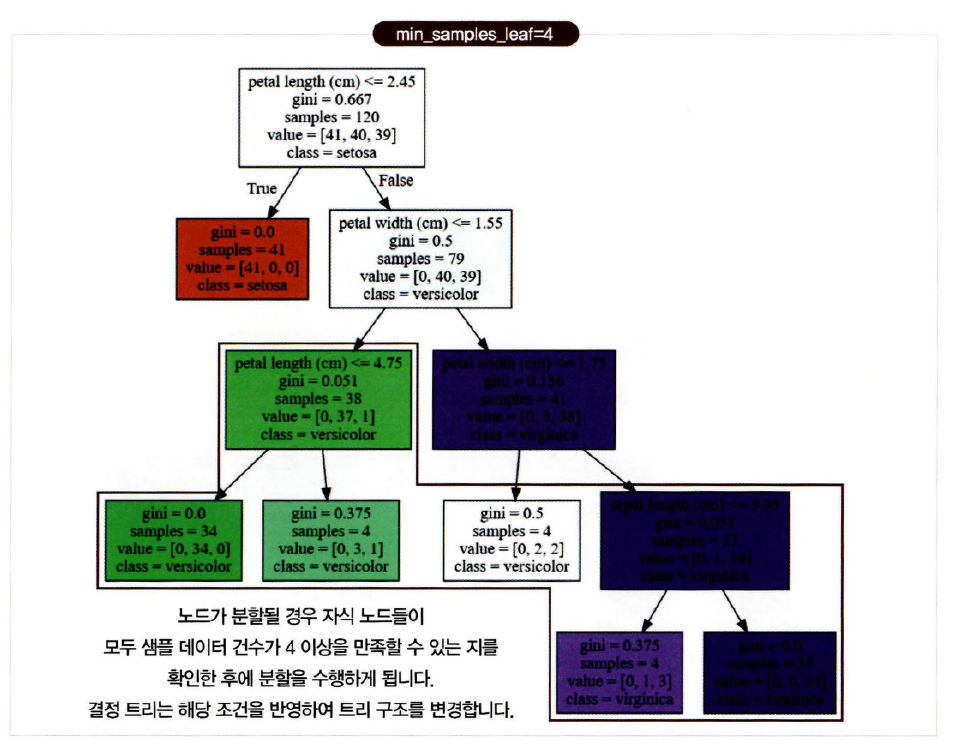

- **feature_importances_** :

    피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것

    ndarray 형태로 값을 반환하여 피처의 중요도를 피처 순서대로 값을 할당해줌

    일반적으로 값이 높을수록 해당 피처의 중요도가 높은 것을 의미

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025005
sepal width (cm) : 0.000000
petal length (cm) : 0.554903
petal width (cm) : 0.420092


<Axes: >

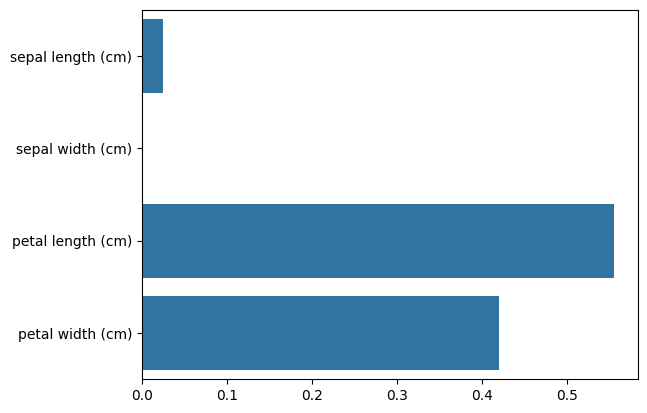

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:3f}'.format(name, value))

# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### **결정 트리 과적합(Overfitting)**

- **make_classification( )** : 분류를 위한 테스트용 데이터를 쉽게 만드는 함수, 호출 시 반환되는 객체는 피치 데이터 세트와 클래스 레이블 데이터 세트

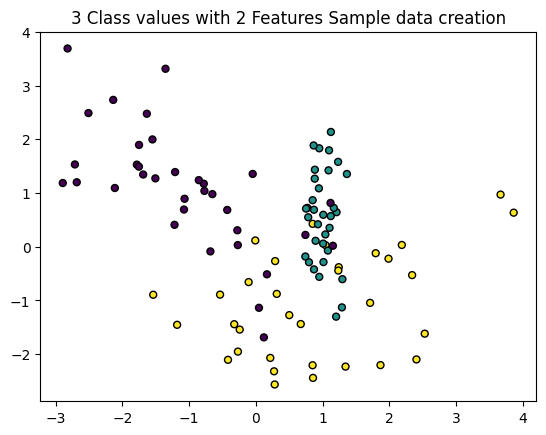

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각회, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')



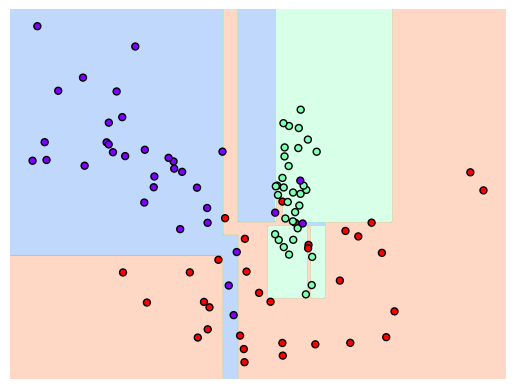

In [ ]:
## 결정 트리 생성에 별다른 제약이 없도록 하이퍼 파라미터가 디폴트인 Classifier를 학습하고 결정 기준 경계를 시각화

from sklearn.tree import DecisionTreeClassifier

# Classifier의 Decision Boundary를 시각화 하는 함수 정의
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

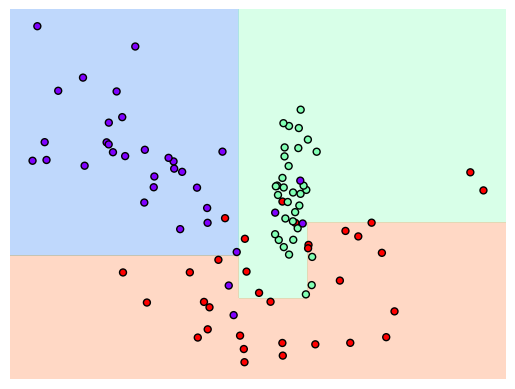

In [ ]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### **결정 트리 실습 - 사용자 행동 인식 데이터 세트**

In [ ]:
import pandas as pd
import matplotlib.pyplot as pit
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/features.txt', sep='\s+',header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
# 중복된 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


column_index
column_name                               
fBodyAcc-bandsEnergy()-1,16              3
fBodyAcc-bandsEnergy()-1,24              3
fBodyAcc-bandsEnergy()-1,8               3
fBodyAcc-bandsEnergy()-17,24             3
fBodyAcc-bandsEnergy()-17,32             3

In [ ]:
# 중복된 피처명에 대해서는 원본 피처명 _1 또는 _2를 추가로 부여해 새로운 피처명을 가지는 DataFrame 반환
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/features.txt', sep='\s+',
                                  header = None, names = ['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/X_train.txt', sep = '\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/X_test.txt', sep = '\s+', names=feature_name)

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    y_train = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
# 로드한 학습용 피처 데이터 세트 살펴보기
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [ ]:
# 사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류를 수행

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [ ]:
# 결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향 확인하기
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [ 6, 8 ,10, 12, 16 ,20, 24],
    'min_samples_split': [16]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

param_max_depth  mean_test_score
0                6         0.847662
1                8         0.854879
2               10         0.852705
3               12         0.845768
4               16         0.847127
5               20         0.848624
6               24         0.848624

mean_test_score : 5개 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치

max_depth가 8일 때 0.854로 정확도가 정점

In [ ]:
max_depths = [ 6, 8, 10, 12, 16, 20, 24]

# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [ ]:
# max_depth와 min_samples_split을 같이 변경하면서 정확도 성능 튜닝하기
params = {
    'max_depth': [ 8, 12, 16, 20],
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# 별도 분리된 테스트 데이터 세트에 max_depth가 8, min_samples_split가 16인 하이퍼 파라미터 적용하기
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


<function matplotlib.pyplot.show(close=None, block=None)>

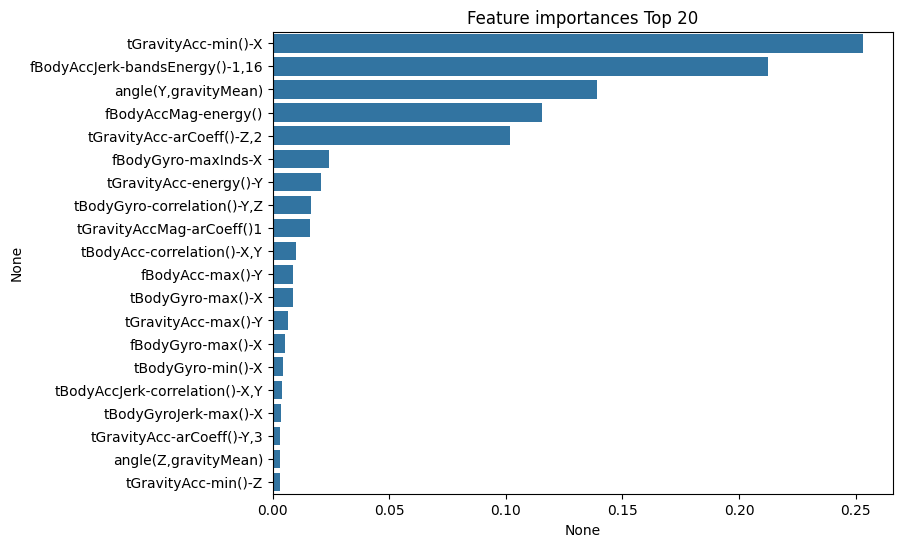

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show

가장 높은 중요도를 가진 Top 5의 피처들이 매우 중요하게 규칙 생성에 영향을 미치는 것을 확인할 수 있음